In [1]:
import re
import pandas as pd
import numpy as np
from collections import defaultdict

# Set Pandas to display all rows of dataframes
pd.set_option('display.max_rows', 500)

# nltk
from nltk import tokenize

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Plotting tools
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from tqdm import tqdm_notebook as tqdm
from tqdm import trange


import os 
from pathlib import Path

In [2]:
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.sentiments import PatternAnalyzer

In [3]:
from src import my_books_sentiment_analyzer as my_analyzer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
directory_path = my_analyzer.get_books_directory_path()

In [5]:
books = []
books = my_analyzer.get_list_of_books(directory_path, books)


['1984.txt', 'Aladdin-Ruth_Hobart.txt', 'at_the_mountains_of_madness.txt', 'Brave_New_World_Aldous_Huxley.txt', 'Peter_Pan-J_M_Barrie.txt', 'Sleeping_Beauty-Charles_Perrault.txt', 'The Call of Cthulhu - H. P. Lovecraft.txt', 'The_Old_Man_and_the_Sea-Ernest_Hemingway.txt']


In [6]:
books_elements_pattern = my_analyzer.define_pattern_to_get_chapters_information()

### Books dictionary

In [7]:
my_books_dictionary = defaultdict(dict)
my_books_dictionary = my_analyzer.initialize_books_dictionary(directory_path, my_books_dictionary, books, books_elements_pattern)

### Textblob Analysis

In [8]:
nb = Blobber(analyzer=NaiveBayesAnalyzer())

In [9]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\arace\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [10]:
for book in my_books_dictionary:
    print(book)
    for chapter in tqdm(my_books_dictionary[book]):
#       print('  ', my_books_dictionary[book][chapter][0])
        text = my_books_dictionary[book][chapter][1].replace('\n', '')
        sentence_list = tokenize.sent_tokenize(text)
        sentiments = 0
        
        for sentence in sentence_list:
            sentiments += nb(sentence).sentiment.p_pos * 2 - 1
            
        sentiments = sentiments / len(sentence_list)

        my_books_dictionary[book][chapter] = (my_books_dictionary[book][chapter][0], my_books_dictionary[book][chapter][1], sentiments)
#   print()

1984



Aladdin-Ruth_Hobart



at_the_mountains_of_madness



Brave_New_World_Aldous_Huxley



Peter_Pan-J_M_Barrie



Sleeping_Beauty-Charles_Perrault



The Call of Cthulhu - H. P. Lovecraft



The_Old_Man_and_the_Sea-Ernest_Hemingway


In [11]:
book_indices = my_analyzer.get_books_indices(my_books_dictionary)
book_indices

{'1984': (0, 25),
 'Aladdin-Ruth_Hobart': (25, 26),
 'at_the_mountains_of_madness': (26, 38),
 'Brave_New_World_Aldous_Huxley': (38, 56),
 'Peter_Pan-J_M_Barrie': (56, 63),
 'Sleeping_Beauty-Charles_Perrault': (63, 64),
 'The Call of Cthulhu - H. P. Lovecraft': (64, 67),
 'The_Old_Man_and_the_Sea-Ernest_Hemingway': (67, 73)}

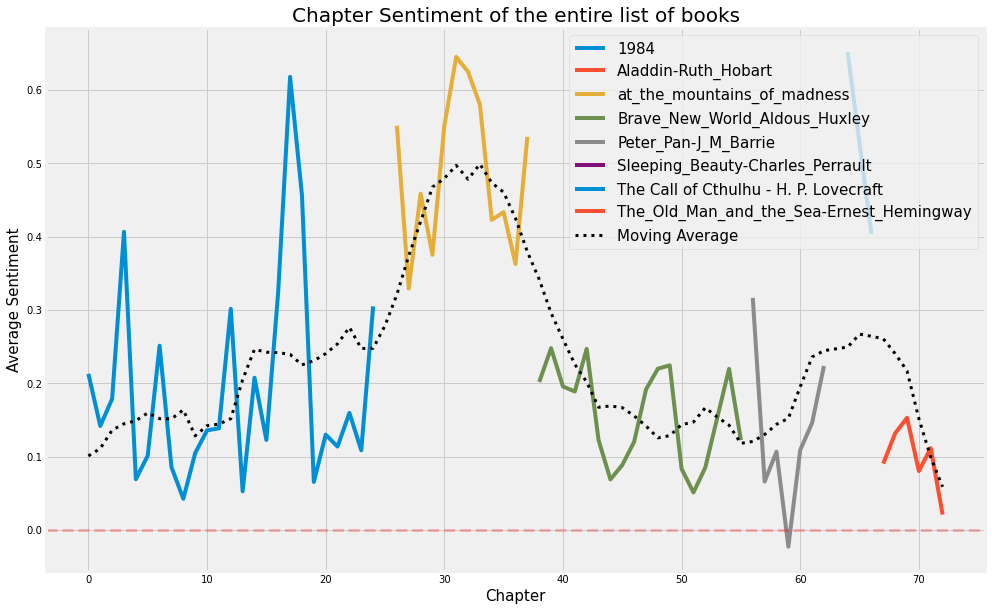

In [12]:
length = sum([len(my_books_dictionary[book]) for book in my_books_dictionary])
x = np.linspace(0, length - 1, num=length)
y = [my_books_dictionary[book][chapter][2] for book in my_books_dictionary for chapter in my_books_dictionary[book]]

plt.figure(figsize=(15, 10))
for book in book_indices:
    plt.plot(x[book_indices[book][0]: book_indices[book][1]],
             y[book_indices[book][0]: book_indices[book][1]],
             label=book)
plt.plot(my_analyzer.movingaverage(y, 10), color='k', linewidth=3, linestyle=':', label = 'Moving Average')
plt.axhline(y=0, xmin=0, xmax=length, alpha=.25, color='r', linestyle='--', linewidth=3)
plt.legend(loc='best', fontsize=15)
plt.title('Chapter Sentiment of the entire list of books', fontsize=20)
plt.xlabel('Chapter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.show()